In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D  
import os
import cv2


In [3]:
dir =  '/content/drive/My Drive/Colab Notebooks/Garbage classification'

In [4]:
files = ['cardboard','glass','metal','paper','plastic']

In [5]:
def convert_folder(path , folder):
    final = []
    ff = os.path.join(path, folder)
    loc = os.listdir(os.path.join(path, folder) )
    n_loc = []
    for i in range(len(loc)):
        n_loc.append(folder+str(i+1)+'.jpg')
        
    if set(n_loc) != set(loc):
        return 0
    
    
    for j in n_loc:
        img = cv2.imread(os.path.join(ff, j),cv2.IMREAD_UNCHANGED )
    #    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        final.append(cv2.resize(GRAY_img, (300,300)))
    return np.array(final)  

In [6]:
# Converting from .jpg to .npy format
cardboard = convert_folder(dir , files[0])
glass = convert_folder(dir, files[1])
metal =  convert_folder(dir, files[2])
paper = convert_folder(dir, files[3])
plastic = convert_folder(dir, files[4])

In [7]:
print(cardboard.shape)
print(glass.shape)
print(metal.shape)
print(paper.shape)
print(plastic.shape)

(403, 300, 300)
(501, 300, 300)
(410, 300, 300)
(594, 300, 300)
(482, 300, 300)


In [8]:
# Converting from 3D to 2D array to make it use with np.c__ for labelling
cardboard=cardboard.reshape(cardboard.shape[0],300*300).astype('float32')
glass=glass.reshape(glass.shape[0],300*300).astype('float32')
metal=metal.reshape(metal.shape[0],300*300).astype('float32')
paper=paper.reshape(paper.shape[0],300*300).astype('float32')
plastic=plastic.reshape(plastic.shape[0],300*300).astype('float32')
print(cardboard.shape)
print(glass.shape)
print(metal.shape)
print(paper.shape)
print(plastic.shape)

(403, 90000)
(501, 90000)
(410, 90000)
(594, 90000)
(482, 90000)


In [9]:
# Adds on one more column in array of labels in each category 
cardboard=np.c_[cardboard,np.zeros(len(cardboard))]
glass=np.c_[glass,np.ones(len(glass))]
metal=np.c_[metal,2*np.ones(len(metal))]
paper=np.c_[paper,3*np.ones(len(paper))]
plastic=np.c_[plastic,4*np.ones(len(plastic))]

In [10]:
def plot_samples(input_array,rows=1,cols=5,title=''):
    fig,ax=plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)
    
    for i in list(range(0,min(len(input_array),(rows*cols)))):
        a=fig.add_subplot(rows,cols,i+1)
        imgplot=plt.imshow(input_array[i,:10000].reshape((100,100)),cmap='gray_r',interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

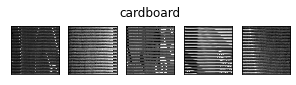

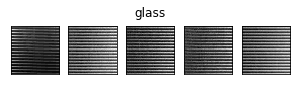

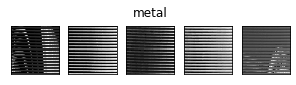

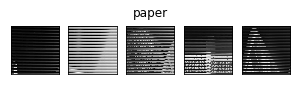

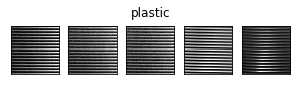

In [11]:
# Just for plotting the images
plot_samples(cardboard,title='cardboard')
plot_samples(glass,title='glass')
plot_samples(metal,title='metal')
plot_samples(paper,title='paper')
plot_samples(plastic,title='plastic')

In [12]:
# Extracting equal no. of rows(examples) from each category except the last column for the making of input matrix
X=np.concatenate((cardboard[:400,:-1],glass[:400,:-1],metal[:400,:-1],paper[:400,:-1],plastic[:400,:-1]),axis=0).astype('float32')
# Extracting equal no. of rows(examples) from each category with only the last column(labels) for the making of output vector
y=np.concatenate((cardboard[:400,-1],glass[:400,-1],metal[:400,-1],paper[:400,-1],plastic[:400,-1]),axis=0).astype('float32') 
# Normalising the pixel values of input matrix by dividing by 255. to bring in similar scales
# Splitting of datasets in 70:30 with shuffling 
X_train,X_test,y_train,y_test=train_test_split(X/255.,y,test_size=0.3,random_state=0)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1400, 90000), (1400,), (600, 90000), (600,))

In [14]:
# Converts the class(output) vector to binary matrix for use with categorical_crossentropy
Y_train=np_utils.to_categorical(y_train,5)
Y_test=np_utils.to_categorical(y_test,5)
X_train=X_train.reshape(X_train.shape[0],300,300,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],300,300,1).astype('float32')

In [15]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1400, 300, 300, 1), (600, 300, 300, 1), (1400, 5), (600, 5))

In [16]:
model =Sequential()

model.add(Conv2D(32, (3,3),padding='same',
          input_shape=(300,300,1))) 
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3),padding='same',
          input_shape=(300,300,1))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 300, 300, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 300, 300, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1440000)           0

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=9)

Epoch 1/9
44/44 [==============================] - 517s 12s/step - loss: 7.6004 - accuracy: 0.2257 - val_loss: 1.5204 - val_accuracy: 0.3183
Epoch 2/9
44/44 [==============================] - 511s 12s/step - loss: 1.4838 - accuracy: 0.3621 - val_loss: 1.5181 - val_accuracy: 0.3300
Epoch 3/9
44/44 [==============================] - 513s 12s/step - loss: 1.1939 - accuracy: 0.5293 - val_loss: 1.4295 - val_accuracy: 0.4167
Epoch 4/9
44/44 [==============================] - 513s 12s/step - loss: 0.8537 - accuracy: 0.6900 - val_loss: 1.5559 - val_accuracy: 0.4233
Epoch 5/9
44/44 [==============================] - 511s 12s/step - loss: 0.5654 - accuracy: 0.8007 - val_loss: 1.5366 - val_accuracy: 0.4133
Epoch 6/9
44/44 [==============================] - 514s 12s/step - loss: 0.3792 - accuracy: 0.8871 - val_loss: 2.1934 - val_accuracy: 0.3767
Epoch 7/9
44/44 [==============================] - 512s 12s/step - loss: 0.2696 - accuracy: 0.9264 - val_loss: 1.8829 - val_accuracy: 0.4233
Epoch 8/9
44/

Prediction from the neural network:

 [[2.8836917e-05 5.9298764e-05 5.4578278e-03 9.9444455e-01 9.5288333e-06]]


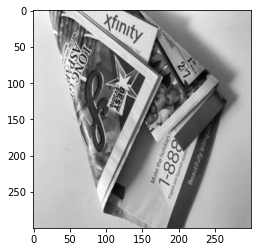



Final Output: paper


In [24]:
example = X_test[7]
prediction = model.predict(example.reshape(1, 300, 300, 1))
print ("Prediction from the neural network:\n\n {}".format(prediction))
plt.imshow(example.reshape(300, 300), cmap="gray")
plt.show()
files=["cardboard","glass","metal","paper","plastic"]
print("\n\nFinal Output: {}".format(files[np.argmax(prediction)]))